In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

energia2022 = pd.read_csv('daasbstp2023/train/energia_202201-202212.csv', encoding='latin-1')    
energia2021 = pd.read_csv('daasbstp2023/train/energia_202109-202112.csv', encoding='latin-1')

energia2023_test = pd.read_csv('daasbstp2023/test/energia_202301-202304.csv', encoding='latin-1')

meteo2022 = pd.read_csv('daasbstp2023/train/meteo_202201-202212.csv', encoding='latin-1')
meteo2021 = pd.read_csv('daasbstp2023/train/meteo_202109-202112.csv', encoding='latin-1')

meteo2023_test = pd.read_csv('daasbstp2023/test/meteo_202301-202304.csv', encoding='latin-1')


# Converter datas
energia2021['Data'] = pd.to_datetime(energia2021['Data'], format='%Y-%m-%d')
energia2021['Hora'] = pd.to_datetime(energia2021['Hora'], format='%H')

energia2021['dt_converted'] = energia2021['Data'] + pd.to_timedelta(energia2021['Hora'].dt.hour, unit='h')

energia2021['dt_converted'] = pd.to_datetime(energia2021['dt_converted'], unit='s', utc=True)


energia2022['Data'] = pd.to_datetime(energia2022['Data'], format='%Y-%m-%d')
energia2022['Hora'] = pd.to_datetime(energia2022['Hora'], format='%H')

energia2022['dt_converted'] = energia2022['Data'] + pd.to_timedelta(energia2022['Hora'].dt.hour, unit='h')

energia2022['dt_converted'] = pd.to_datetime(energia2022['dt_converted'], unit='s', utc=True)


energia2023_test['Data'] = pd.to_datetime(energia2023_test['Data'], format='%Y-%m-%d')
energia2023_test['Hora'] = pd.to_datetime(energia2023_test['Hora'], format='%H')

energia2023_test['dt_converted'] = energia2023_test['Data'] + pd.to_timedelta(energia2023_test['Hora'].dt.hour, unit='h')

energia2023_test['dt_converted'] = pd.to_datetime(energia2023_test['dt_converted'], unit='s', utc=True)


meteo2021['dt_converted'] = pd.to_datetime(meteo2021['dt'], unit='s', utc=True)
meteo2022['dt_converted'] = pd.to_datetime(meteo2022['dt'], unit='s', utc=True)
meteo2023_test['dt_converted'] = pd.to_datetime(meteo2023_test['dt'], unit='s', utc=True)

# Merge datasets based on datetime
data21 = pd.merge(energia2021, meteo2021, on='dt_converted', how='inner')
data22 = pd.merge(energia2022, meteo2022, on='dt_converted', how='inner')

test = pd.merge(energia2023_test, meteo2023_test, on='dt_converted', how='outer')

# Drop columns
data21.drop('sea_level', axis=1, inplace=True)
data21.drop('grnd_level', axis=1, inplace=True)
data21.drop('rain_1h', axis=1, inplace=True)
data21.drop('Data', axis=1, inplace=True)
data21.drop('Hora', axis=1, inplace=True)
data21.drop('dt_iso', axis=1, inplace=True)
data21.drop('dt', axis=1, inplace=True)

data22.drop('sea_level', axis=1, inplace=True)
data22.drop('grnd_level', axis=1, inplace=True)
data22.drop('rain_1h', axis=1, inplace=True)
data22.drop('Data', axis=1, inplace=True)
data22.drop('Hora', axis=1, inplace=True)
data22.drop('dt_iso', axis=1, inplace=True)
data22.drop('dt', axis=1, inplace=True)

test.drop('sea_level', axis=1, inplace=True)
test.drop('grnd_level', axis=1, inplace=True)
test.drop('rain_1h', axis=1, inplace=True)
test.drop('Data', axis=1, inplace=True)
test.drop('Hora', axis=1, inplace=True)
test.drop('dt_iso', axis=1, inplace=True)
test.drop('dt', axis=1, inplace=True)

data21.drop('city_name', axis=1, inplace=True)
data22.drop('city_name', axis=1, inplace=True)
test.drop('city_name', axis=1, inplace=True)

train = pd.concat([data21, data22], axis=0)


# separar data em ano, mes e dia

train['ano'] = train['dt_converted'].apply(lambda x: x.year)
train['mes'] = train['dt_converted'].apply(lambda x: x.month)
train['dia'] = train['dt_converted'].apply(lambda x: x.day)
train['hora'] = train['dt_converted'].apply(lambda x: x.hour)

train['dia da semana'] = train['dt_converted'].apply(lambda x: x.weekday())

test['ano'] = test['dt_converted'].apply(lambda x: x.year)
test['mes'] = test['dt_converted'].apply(lambda x: x.month)
test['dia'] = test['dt_converted'].apply(lambda x: x.day)
test['hora'] = test['dt_converted'].apply(lambda x: x.hour)

#test['dia da semana'] = test['dt_converted'].apply(lambda x: x.weekday())

test['dia da semana'] = test['dt_converted'].apply(lambda x: 1 if x.weekday() >= 5 else 0)


train.drop('dt_converted', axis=1, inplace=True)
test.drop('dt_converted', axis=1, inplace=True)

lb_make = LabelEncoder()
train["weather_description"] = lb_make.fit_transform(train["weather_description"])
test["weather_description"] = lb_make.fit_transform(test["weather_description"])


train["weather_description"].unique()


train['Injeção na rede (kWh)'] = train['Injeção na rede (kWh)'].fillna('None')

dict_target = {"None": 0, "Low": 1, "Medium": 2, "High": 3, "Very High": 4}
train["Injeção na rede (kWh)"] = train["Injeção na rede (kWh)"].map(dict_target)

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,2256.000000,2256.000000,2256.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,2256.000000,2256.0,2256.000000,2256.000000,2256.000000,2256.000000
mean,0.268060,0.226809,0.119439,10.599606,9.543265,9.177917,11.643813,1023.493721,75.639840,2.873613,44.489726,5.620124,2023.0,2.085106,14.978723,11.500000,0.287234
std,0.464323,0.375752,0.190601,3.715156,4.191224,4.021176,3.596882,6.650873,17.415468,1.620450,42.972438,2.392843,0.0,0.907143,8.925982,6.923721,0.452572
min,0.000000,0.000000,0.000000,0.930000,-1.790000,-0.850000,3.340000,1006.000000,23.000000,0.120000,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.877500,6.217500,6.247500,8.900000,1020.000000,62.000000,1.800000,0.000000,4.000000,2023.0,1.000000,7.000000,5.750000,0.000000
50%,0.000000,0.000000,0.000000,10.950000,10.135000,9.710000,11.820000,1024.000000,81.000000,2.490000,35.000000,7.000000,2023.0,2.000000,15.000000,11.500000,0.000000
75%,0.398750,0.336000,0.237250,13.292500,12.742500,12.320000,14.040000,1029.000000,91.000000,3.500000,96.000000,7.000000,2023.0,3.000000,23.000000,17.250000,1.000000
max,3.381000,2.771000,1.161000,20.610000,19.790000,20.010000,22.010000,1036.000000,97.000000,10.320000,100.000000,8.000000,2023.0,4.000000,31.000000,23.000000,1.000000


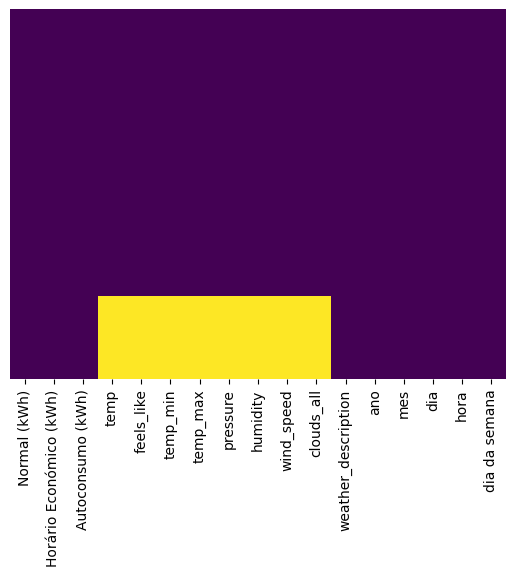

In [88]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
test.describe()

In [89]:
# test["temp"] = test["temp"].interpolate(method='linear', limit_direction='both', axis=0)
# test["temp_min"] = test["temp_min"].interpolate(method='linear', limit_direction='both', axis=0)
# test["temp_max"] = test["temp_max"].interpolate(method='linear', limit_direction='both', axis=0)
# test["pressure"] = test["pressure"].interpolate(method='linear',  limit_direction='both', axis=0)
# test["humidity"] = test["humidity"].interpolate(method='linear',  limit_direction='both', axis=0)
# test["wind_speed"] = test["wind_speed"].interpolate(method='linear',  limit_direction='both', axis=0)
# test["clouds_all"] = test["clouds_all"].interpolate(method='linear',  limit_direction='both', axis=0)
# test["feels_like"] = test["feels_like"].interpolate(method='linear',  limit_direction='both', axis=0)


In [90]:
test.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
0,0.0,0.467,0.0,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,100.0,4,2023,1,1,0,1
1,0.0,0.577,0.0,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,100.0,4,2023,1,1,1,1
2,0.0,0.346,0.0,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,100.0,4,2023,1,1,2,1
3,0.0,0.270,0.0,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,100.0,4,2023,1,1,3,1
4,0.0,0.252,0.0,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,100.0,4,2023,1,1,4,1


In [91]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# # Lista das colunas que você deseja prever independentemente
# columns_to_predict = ['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'clouds_all']

# #o dataset de treino nao pode ter valores nulos
# test2 = test.dropna(subset=columns_to_predict)

# #dropar colunas que nao serao usadas para prever "columns_to_predict"
# # test3 = test.drop(columns_to_predict, axis=1)
# # Iterar sobre as colunas e treinar modelos separados
# for column in columns_to_predict:
    
#     train_data = test2.dropna(subset=[column])
#     predict_data = test[test[column].isnull()]
    
#     for i in columns_to_predict:
#         if i != column:
#             train_data = train_data.drop(i, axis=1)
#         predict_data = predict_data.drop(i, axis=1)
        
    
#     X_train = train_data.drop(column, axis=1)
#     y_train = train_data[column]

#     # Treinar o modelo (usando regressão linear neste exemplo)
#     model = DecisionTreeRegressor()
#     model.fit(X_train, y_train)

#     # Fazer previsões para os valores ausentes
#     predictions = model.predict(predict_data)

#     # Adicionar as previsões ao DataFrame original
#     test.loc[test[column].isnull(), column] = predictions
    
# sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [92]:
test.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,2256.000000,2256.000000,2256.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,2256.000000,2256.0,2256.000000,2256.000000,2256.000000,2256.000000
mean,0.268060,0.226809,0.119439,10.599606,9.543265,9.177917,11.643813,1023.493721,75.639840,2.873613,44.489726,5.620124,2023.0,2.085106,14.978723,11.500000,0.287234
std,0.464323,0.375752,0.190601,3.715156,4.191224,4.021176,3.596882,6.650873,17.415468,1.620450,42.972438,2.392843,0.0,0.907143,8.925982,6.923721,0.452572
min,0.000000,0.000000,0.000000,0.930000,-1.790000,-0.850000,3.340000,1006.000000,23.000000,0.120000,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.877500,6.217500,6.247500,8.900000,1020.000000,62.000000,1.800000,0.000000,4.000000,2023.0,1.000000,7.000000,5.750000,0.000000
50%,0.000000,0.000000,0.000000,10.950000,10.135000,9.710000,11.820000,1024.000000,81.000000,2.490000,35.000000,7.000000,2023.0,2.000000,15.000000,11.500000,0.000000
75%,0.398750,0.336000,0.237250,13.292500,12.742500,12.320000,14.040000,1029.000000,91.000000,3.500000,96.000000,7.000000,2023.0,3.000000,23.000000,17.250000,1.000000
max,3.381000,2.771000,1.161000,20.610000,19.790000,20.010000,22.010000,1036.000000,97.000000,10.320000,100.000000,8.000000,2023.0,4.000000,31.000000,23.000000,1.000000


# 3 - ...

## Outliers

In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float64
 1   Horário Económico (kWh)  2256 non-null   float64
 2   Autoconsumo (kWh)        2256 non-null   float64
 3   temp                     1752 non-null   float64
 4   feels_like               1752 non-null   float64
 5   temp_min                 1752 non-null   float64
 6   temp_max                 1752 non-null   float64
 7   pressure                 1752 non-null   float64
 8   humidity                 1752 non-null   float64
 9   wind_speed               1752 non-null   float64
 10  clouds_all               1752 non-null   float64
 11  weather_description      2256 non-null   int32  
 12  ano                      2256 non-null   int64  
 13  mes                      2256 non-null   int64  
 14  dia                     

count    11016.000000
mean         0.202278
std          0.349478
min          0.000000
25%          0.000000
50%          0.000000
75%          0.314000
max          3.251000
Name: Normal (kWh), dtype: float64

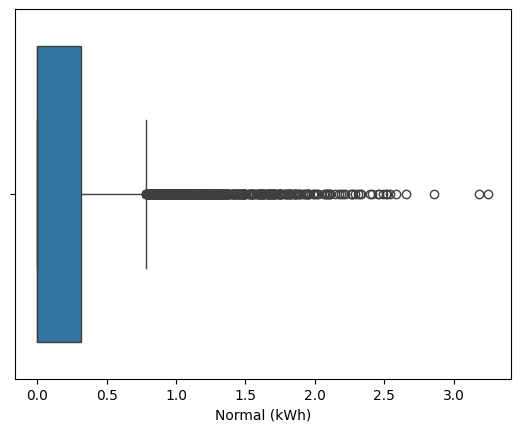

In [94]:
sns.boxplot(x=train["Normal (kWh)"])
train["Normal (kWh)"].describe()

In [95]:
# train.loc[train['Normal (kWh)'] > 3, 'Normal (kWh)'] = 3
# test.loc[train.bmi > 2.5, 'Normal (kWh)'] = np.nan
# test.fillna(2.5, inplace=True)

count    11016.000000
mean         0.159714
std          0.271792
min          0.000000
25%          0.000000
50%          0.000000
75%          0.288000
max          6.978000
Name: Horário Económico (kWh), dtype: float64

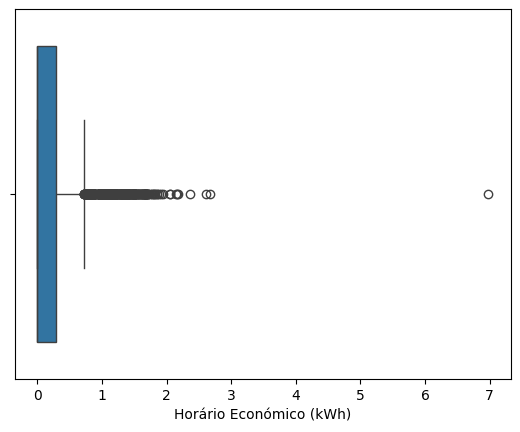

In [96]:
sns.boxplot(x=train["Horário Económico (kWh)"])
train["Horário Económico (kWh)"].describe()

In [97]:
# train.loc[train['Horário Económico (kWh)'] > 4, 'Horário Económico (kWh)'] = 4

count    11016.000000
mean         0.117314
std          0.176762
min          0.000000
25%          0.000000
50%          0.000000
75%          0.227000
max          1.192000
Name: Autoconsumo (kWh), dtype: float64

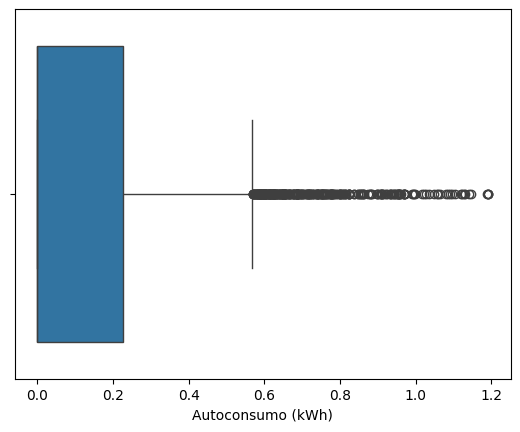

In [98]:
sns.boxplot(x=train["Autoconsumo (kWh)"])
train["Autoconsumo (kWh)"].describe()

In [99]:
# train.loc[train['Autoconsumo (kWh)'] > 1.1, 'Autoconsumo (kWh)'] = 1.1

count    11016.000000
mean        16.182991
std          5.756972
min          0.320000
25%         12.080000
50%         15.625000
75%         19.270000
max         40.850000
Name: temp, dtype: float64

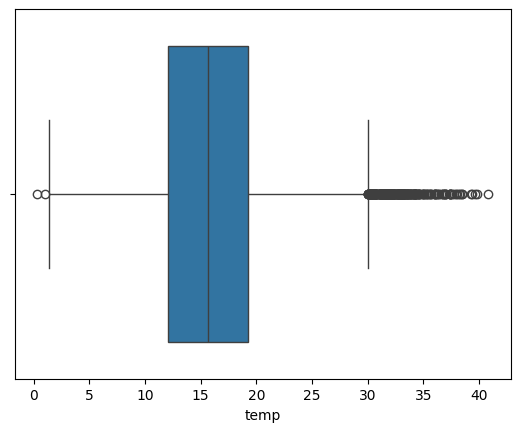

In [100]:
sns.boxplot(x=train["temp"])
train["temp"].describe()

count    11016.000000
mean        15.826868
std          6.264860
min         -2.190000
25%         11.507500
50%         15.230000
75%         19.260000
max         41.330000
Name: feels_like, dtype: float64

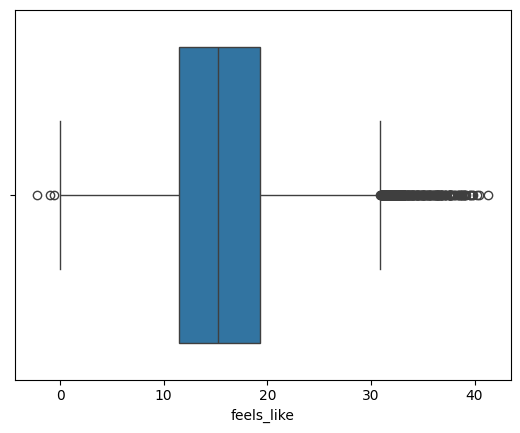

In [101]:
sns.boxplot(x=train["feels_like"])
train["feels_like"].describe()

count    11016.000000
mean        14.195064
std          4.956014
min         -0.640000
25%         10.720000
50%         14.230000
75%         17.490000
max         36.720000
Name: temp_min, dtype: float64

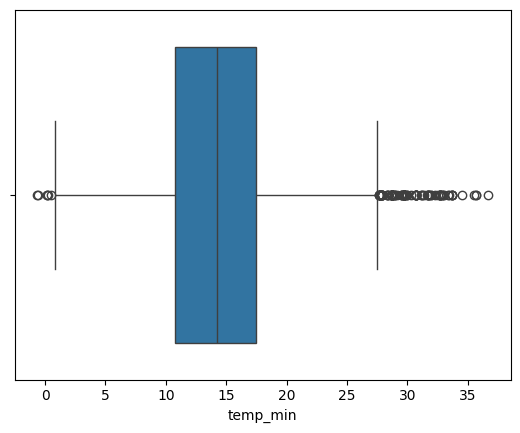

In [102]:
sns.boxplot(x=train["temp_min"])
train["temp_min"].describe()

count    11016.000000
mean        17.288098
std          6.164689
min          1.330000
25%         12.890000
50%         16.260000
75%         20.340000
max         41.450000
Name: temp_max, dtype: float64

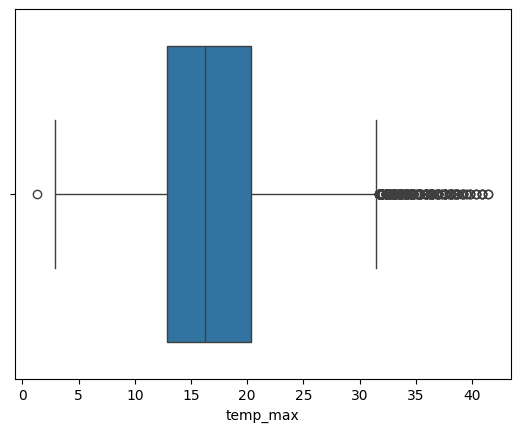

In [103]:
sns.boxplot(x=train["temp_max"])
train["temp_max"].describe()

count    11016.000000
mean      1018.396605
std          6.203379
min        994.000000
25%       1015.000000
50%       1018.000000
75%       1022.000000
max       1034.000000
Name: pressure, dtype: float64

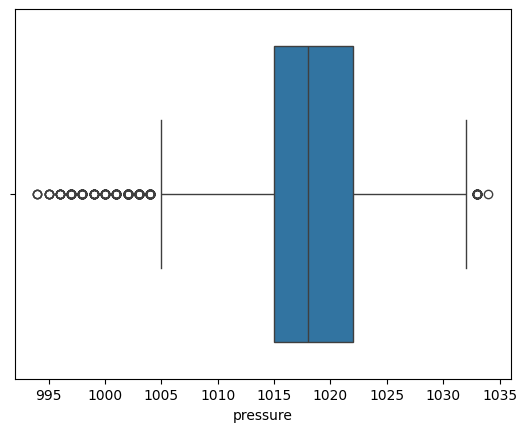

In [104]:
sns.boxplot(x=train["pressure"])
train["pressure"].describe()

count    11016.000000
mean        76.570715
std         16.268260
min         19.000000
25%         66.000000
50%         81.000000
75%         91.000000
max        100.000000
Name: humidity, dtype: float64

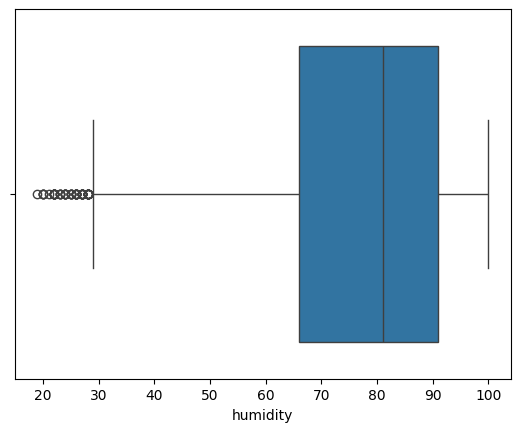

In [105]:
sns.boxplot(x=train["humidity"])
train["humidity"].describe()

count    11016.000000
mean         2.672039
std          1.476158
min          0.060000
25%          1.620000
50%          2.400000
75%          3.420000
max         11.100000
Name: wind_speed, dtype: float64

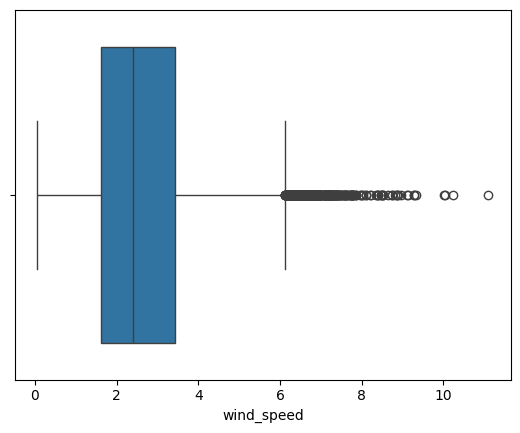

In [106]:
sns.boxplot(x=train["wind_speed"])
train["wind_speed"].describe()

count    11016.000000
mean        54.000908
std         40.553002
min          0.000000
25%          7.000000
50%         60.000000
75%         98.000000
max        100.000000
Name: clouds_all, dtype: float64

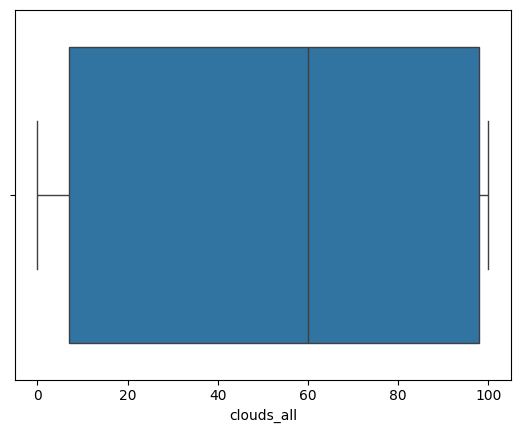

In [107]:
sns.boxplot(x=train["clouds_all"])
train["clouds_all"].describe()

# Drop de colunas 

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  clouds_all               11016 non-null  int64  
 12  weather_description      11016 non-null  int32  
 13  ano                      11016 non-null  int64  
 14  mes                      110

In [109]:

train.drop('dia', axis=1, inplace=True)
test.drop('dia', axis=1, inplace=True)

train.drop('ano', axis=1, inplace=True)
test.drop('ano', axis=1, inplace=True)

train.drop('dia da semana', axis=1, inplace=True)
test.drop('dia da semana', axis=1, inplace=True)


test.drop('feels_like', axis=1, inplace=True)
train.drop('feels_like', axis=1, inplace=True)

train.drop('wind_speed', axis=1, inplace=True)
test.drop('wind_speed', axis=1, inplace=True)

test.drop('pressure', axis=1, inplace=True)
train.drop('pressure', axis=1, inplace=True)

test.drop('clouds_all', axis=1, inplace=True)
train.drop('clouds_all', axis=1, inplace=True)



In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   temp_min                 11016 non-null  float64
 6   temp_max                 11016 non-null  float64
 7   humidity                 11016 non-null  int64  
 8   weather_description      11016 non-null  int32  
 9   mes                      11016 non-null  int64  
 10  hora                     11016 non-null  int64  
dtypes: float64(6), int32(1), int64(4)
memory usage: 989.7 KB


In [111]:
def daypart(hour):
    if hour > 0 and hour <= 8:
        return "dawn"
    elif hour > 8 and hour <= 16:
        return "working_hour"
    else:
        return "midnight"
    
# def daypart(hour):
#     if hour > 0 and hour <= 6:
#         return "madrugada"
#     elif hour > 6 and hour <= 12:
#         return "manha"
#     elif hour > 12 and hour <= 18:
#         return "tarde"
#     elif hour > 18 and hour <= 24:
#         return "noite"

# Aplicar a função daypart aos dados de treino
train['Day_Part'] = train['hora'].apply(daypart)

# Codificação one-hot e substituição por 1 e 0
one_hot_dates = pd.get_dummies(train['Day_Part']).astype(int)
one_hot_dates.columns = ['dawn', 'working_hour', 'midnight']  # Renomear colunas
train = pd.concat([train, one_hot_dates], axis=1)
del train['Day_Part']

# Aplicar a função daypart aos dados de teste
test['Day_Part'] = test['hora'].apply(daypart)

# Codificação one-hot e substituição por 1 e 0
one_hot_dates = pd.get_dummies(test['Day_Part']).astype(int)
one_hot_dates.columns = ['dawn', 'working_hour', 'midnight']  # Renomear colunas
test = pd.concat([test, one_hot_dates], axis=1)
del test['Day_Part']

In [112]:
train.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,temp_min,temp_max,humidity,weather_description,mes,hora,dawn,working_hour,midnight
0,0.0,0.0,0.0,0,13.97,11.45,14.04,81,5,9,0,0,1,0
1,0.0,0.0,0.0,0,13.48,13.43,13.90,82,5,9,1,1,0,0
2,0.0,0.0,0.0,0,12.93,12.72,13.43,84,5,9,2,1,0,0
3,0.0,0.0,0.0,0,12.61,10.34,12.93,85,5,9,3,1,0,0
4,0.0,0.0,0.0,0,12.61,9.79,12.93,86,5,9,4,1,0,0


# Correlação

In [113]:
plt.subplots(figsize=(18,10))
train_corr = train.corr(method='pearson')
sns.heatmap(train_corr, annot = True, cmap='coolwarm')

<AxesSubplot: >

In [ ]:
from scipy import stats
# Substitua 'seu_data_frame' e 'sua_coluna' pelos nomes do DataFrame e da coluna desejada
dados = train['clouds_all']

# Histograma
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(dados, kde=True)

# Gráfico Q-Q
plt.subplot(1, 2, 2)
stats.probplot(dados, dist='norm', plot=plt)

plt.show()

KeyError: 'clouds_all'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

In [ ]:
train_feat = train.drop(['Injeção na rede (kWh)'], axis = 1)
train_target = train[['Injeção na rede (kWh)']]

x_train = train_feat
y_train= np.ravel(train_target) 

## Oversampling

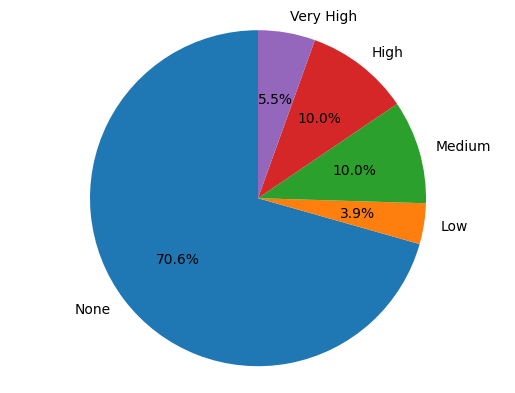

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Suponha que X e y são seus recursos e rótulos, respectivamente
# X, y = ...

# Contar o número de instâncias na classe 1 ("low")
count_class_1 = sum(y_train == 1)

# Criar uma instância do RandomOverSampler com a proporção desejada
oversampler = RandomOverSampler(sampling_strategy={1: int(count_class_1 * 1.5)}, random_state=42)

# Aplicar oversampling apenas na classe 1 do conjunto de treino
x_train, y_train = oversampler.fit_resample(x_train, y_train)



labels = 'None', 'Low', 'Medium', 'High', 'Very High'
sizes = [train['Injeção na rede (kWh)'].value_counts()[0], train['Injeção na rede (kWh)'].value_counts()[1], train['Injeção na rede (kWh)'].value_counts()[2], train['Injeção na rede (kWh)'].value_counts()[3], train['Injeção na rede (kWh)'].value_counts()[4]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')

plt.show()


# Normalização

In [ ]:
train_feat.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,temp_min,temp_max,pressure,humidity,clouds_all,weather_description,ano,mes,hora,dia da semana,dawn,working_hour,midnight
0,0.0,0.0,0.0,13.97,11.45,14.04,1027,81,87,5,2021,9,0,2,0,1,0
1,0.0,0.0,0.0,13.48,13.43,13.90,1028,82,91,5,2021,9,1,2,1,0,0
2,0.0,0.0,0.0,12.93,12.72,13.43,1027,84,93,5,2021,9,2,2,1,0,0
3,0.0,0.0,0.0,12.61,10.34,12.93,1027,85,95,5,2021,9,3,2,1,0,0
4,0.0,0.0,0.0,12.61,9.79,12.93,1027,86,93,5,2021,9,4,2,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(train_feat)
scaler_Y = MinMaxScaler(feature_range=(0, 1)).fit(train_target)
feat_scaled = pd.DataFrame(scaler_X.transform(train_feat[train_feat.columns]), columns=train_feat.columns)
target_scaled = pd.DataFrame(scaler_Y.transform(train_target[train_target.columns]), columns=train_target.columns)

In [ ]:
feat_scaled.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,temp_min,temp_max,pressure,humidity,clouds_all,weather_description,ano,mes,hora,dia da semana,dawn,working_hour,midnight
0,0.0,0.0,0.0,0.336788,0.323608,0.316800,0.825,0.765432,0.87,0.714286,0.0,0.727273,0.000000,0.333333,0.0,1.0,0.0
1,0.0,0.0,0.0,0.324698,0.376606,0.313310,0.850,0.777778,0.91,0.714286,0.0,0.727273,0.043478,0.333333,1.0,0.0,0.0
2,0.0,0.0,0.0,0.311128,0.357602,0.301595,0.825,0.802469,0.93,0.714286,0.0,0.727273,0.086957,0.333333,1.0,0.0,0.0
3,0.0,0.0,0.0,0.303232,0.293897,0.289133,0.825,0.814815,0.95,0.714286,0.0,0.727273,0.130435,0.333333,1.0,0.0,0.0
4,0.0,0.0,0.0,0.303232,0.279176,0.289133,0.825,0.827160,0.93,0.714286,0.0,0.727273,0.173913,0.333333,1.0,0.0,0.0


In [ ]:
feat_scaled.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,temp_min,temp_max,pressure,humidity,clouds_all,weather_description,ano,mes,hora,dia da semana,dawn,working_hour,midnight
count,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,0.062220,0.022888,0.098418,0.391389,0.397084,0.397759,0.609915,0.710750,0.540009,0.624974,0.795207,0.584868,0.500000,0.500726,0.333333,0.333333,0.333333
std,0.107499,0.038950,0.148290,0.142042,0.132656,0.153656,0.155084,0.200843,0.405530,0.343416,0.403569,0.325303,0.300978,0.332439,0.471426,0.471426,0.471426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.290155,0.304069,0.288136,0.525000,0.580247,0.070000,0.428571,1.000000,0.272727,0.250000,0.166667,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.377622,0.398019,0.372134,0.600000,0.765432,0.600000,0.714286,1.000000,0.636364,0.500000,0.500000,0.000000,0.000000,0.000000
75%,0.096586,0.041273,0.190436,0.467555,0.485278,0.473829,0.700000,0.888889,0.980000,1.000000,1.000000,0.909091,0.750000,0.833333,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# sns.heatmap(train_target.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# split train 

In [ ]:
# x_train2, x_test2, y_train2, y_test2 = train_test_split(train_feat, train_target, test_size=0.2, random_state=1000)
x_train2, x_test2, y_train2, y_test2 = train_test_split(feat_scaled, train_target, test_size=0.2, random_state=1000)

## SVM

In [ ]:
# param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

# grid = GridSearchCV(SVC(random_state=1000),param_grid,refit=True,verbose=3)

In [ ]:
# scores = cross_val_score(grid, feat_scaled, train_target, cv=10)

In [ ]:
# print("Result for SVM: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
# grid.fit(x_train2, y_train2)

In [ ]:
# predictions = grid.predict(x_test2)

# predictions

In [ ]:
# from sklearn.metrics import precision_score
# precision = precision_score(y_test2, predictions, average='micro')

# print(f'Precision: {precision}')

# #Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test2, predictions)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
# disp.plot()

## Random Forest

In [ ]:
# x_train2.info()

In [ ]:
# feat_scaled.info()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float64
 1   Horário Económico (kWh)  2256 non-null   float64
 2   Autoconsumo (kWh)        2256 non-null   float64
 3   temp                     2256 non-null   float64
 4   temp_min                 2256 non-null   float64
 5   temp_max                 2256 non-null   float64
 6   pressure                 2256 non-null   float64
 7   humidity                 2256 non-null   float64
 8   clouds_all               2256 non-null   float64
 9   weather_description      2256 non-null   int32  
 10  ano                      2256 non-null   int64  
 11  mes                      2256 non-null   int64  
 12  hora                     2256 non-null   int64  
 13  dia da semana            2256 non-null   int64  
 14  dawn                    

In [ ]:
# modelRandomForest = RandomForestClassifier(n_estimators = 500, max_depth=15,random_state=1000, oob_score=True)
# scores = cross_val_score(modelRandomForest, x_train, y_train, cv=10)
# print("Result for Random Forest: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
# modelRandomForest.fit(x_train, y_train)
# predictions = modelRandomForest.predict(test)

# dict_target = {0 : "None", 1: "Low", 2: "Medium", 3: "High", 4:"Very_High"}
# sto_numeric = [dict_target[result] for result in predictions]

# result_df = pd.DataFrame({'RowId': range(1, len(predictions)+1), 'Result': sto_numeric})
# result_df.to_csv("dummy_submission.csv", index=False)

In [ ]:
# modelRandomForest.fit(x_train2, np.ravel(y_train2))
# predictions = modelRandomForest.predict(x_test2)

# predictions

# from sklearn.metrics import precision_score
# precision = precision_score(y_test2, predictions, average='micro')

# print(f'Precision: {precision}')

# #Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test2, predictions)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
# disp.plot()
# print(classification_report(y_test2, predictions))

In [ ]:
# from sklearn.datasets import load_iris
# # iris = load_iris()
# # X = iris.data
# # y = iris.target

# model = RandomForestClassifier(n_estimators = 500, max_depth=15,random_state=1000)

# # Treinando o modelo
# model.fit(x_train2, np.ravel(y_train2))

# feature_importance = model.feature_importances_

# # Obtendo os nomes das características
# feature_names = x_train2.columns.tolist()

# # Criando um gráfico de barras para visualizar a importância das características
# plt.bar(feature_names, feature_importance)
# plt.xlabel('Feature Names')
# plt.ylabel('Feature Importance')
# plt.title('Feature Importance in Random Forest')
# plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos
# plt.show()

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier


# adamBoosting = AdaBoostClassifier(n_estimators=500, learning_rate=0.1, random_state=1000)
# scores = cross_val_score(adamBoosting, feat_scaled, np.ravel(train_target), cv=10)
# print("Result for AdaBoost: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))


## XGBoost

In [ ]:
param_grid = {
    'n_estimators': [400, 500, 600],
    'learning_rate': [0.01, 0.02, 0.1],
    'max_depth': [4, 5, 6]
}

In [ ]:
from xgboost import XGBClassifier

# xgboost = XGBClassifier(random_state=1000)
# grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(feat_scaled, np.ravel(train_target))
# print("Result for XGBoost: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
# Obtenha os melhores parâmetros e a pontuação correspondente
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Accuracy:", best_score)

In [ ]:
xgboost = XGBClassifier(scale_pos_weight=3, min_child_weight=5,n_estimators=500,learning_rate=0.01, max_depth = 5 ,random_state=42, use_label_encoder=False, eval_metric='merror', objective='multi:softmax', num_class=10, verbosity=0, subsample=0.9)
# scores = cross_val_score(xgboost, x_train, y_train, cv=10)
# print("Result for XGBoost: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
xgboost.fit(x_train,y_train)
predictions = xgboost.predict(test)

dict_target = {0 : "None", 1: "Low", 2: "Medium", 3: "High", 4:"Very_High"}
sto_numeric = [dict_target[result] for result in predictions]

result_df = pd.DataFrame({'RowId': range(1, len(predictions)+1), 'Result': sto_numeric})
result_df.to_csv("dummy_submission.csv", index=False)

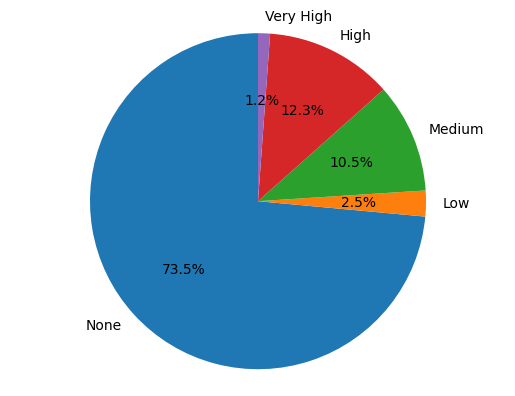

In [ ]:
## grafico circular com a percentagem de cada categoria do target
labels = 'None', 'Low', 'Medium', 'High', 'Very High'
# convert numpy array to dataframe
p = pd.DataFrame(predictions)

sizes = [p.value_counts()[0], p.value_counts()[1], p.value_counts()[2], p.value_counts()[3], p.value_counts()[4]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')

plt.show()

Precision: 0.8856624319419237
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1565
           1       0.49      0.29      0.37        79
           2       0.65      0.63      0.64       226
           3       0.68      0.76      0.72       227
           4       0.73      0.77      0.75       107

    accuracy                           0.89      2204
   macro avg       0.70      0.68      0.69      2204
weighted avg       0.88      0.89      0.88      2204



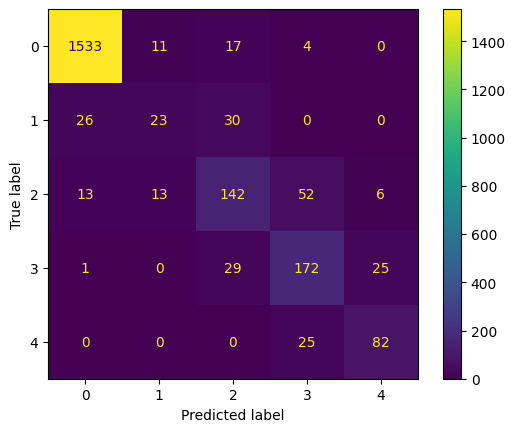

In [ ]:
xgboost.fit(x_train2, y_train2)
predictions = xgboost.predict(x_test2)

predictions

from sklearn.metrics import precision_score
precision = precision_score(y_test2, predictions, average='micro')

print(f'Precision: {precision}')

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
disp.plot()
print(classification_report(y_test2, predictions))